In [1]:
# ARIMA

In [ ]:
# https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

In [2]:
#!pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from pmdarima.arima import auto_arima

In [2]:
sales_data = pd.read_csv("Champagne Sales.csv")
sales_data.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [5]:
sales_data['Month']=pd.to_datetime(sales_data['Month'])
sales_data.set_index('Month',inplace=True)

In [6]:
sales_data.head()

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


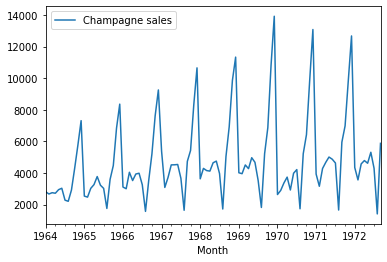

In [7]:
sales_data.plot()

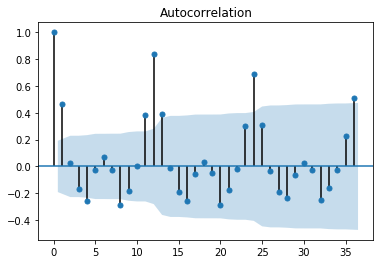

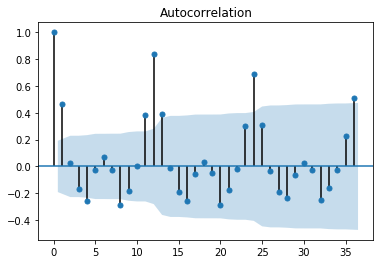

In [9]:
# Plot acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales_data['Champagne sales'], lags=36)

In [10]:
# Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)
# Data is not stationary

(0.01, False)

In [11]:
# Train Test Split
train = sales_data[:85]
test = sales_data[-20:]

In [12]:
# Model Fitting
arima_model =  auto_arima(train, start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.21 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.44 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.15 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.26 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.660, Time=0.90 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.27 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [13]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Wed, 10 Mar 2021   AIC                           1174.564
Time:                                     17:40:55   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.544      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.135      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (Q):                       49.92   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.14   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\wondo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


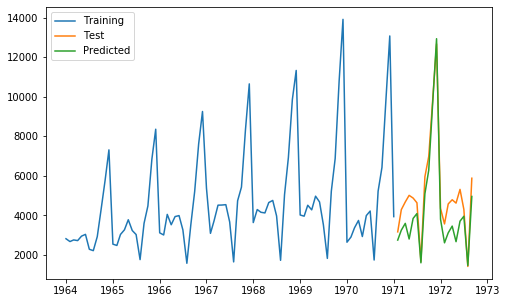

In [14]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']


plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [15]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

C:\Users\wondo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.8114766228263456

In [ ]:
# Facebook Prophet

In [ ]:
# https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [ ]:
#!pip install pystan
#!pip install fbprophet
#!conda install -c conda-forge fbprophet
!conda install -c conda-forge/label/cf202003 fbprophet

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df = train
df.head()

In [ ]:
df.columns = ['ds', 'y']

In [ ]:
m = Prophet()
# m.add_seasonality(name='monthly', period=12, fourier_order=5)
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods = 20, freq = 'MS')
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
prediction = forecast[['ds', 'yhat']]
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])